## Model 23 - with Human Developement Index

### Target:
+ life_ladder  

### Features from Happiness:
+ log_gdp_per_capita
+ social_support
+ healthy_life_expectancy_at_birth
+ freedom_to_make_life_choices
+ perception of corruption
+ positive affect
+ negative affect

### Features from HDI:
 + mys (median years of school)


import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 

In [2]:
sns.set_style("darkgrid")

model_name = 'model_23'

function section

In [3]:
def adjusted_r2(y,y_pred, X):
    adjusted_r2 = 1 - ((1 - r2_score(y, y_pred)) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [4]:
df = pd.read_csv("../data/life_ladder_gdi_eys_mys.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1993 non-null   object 
 1   year                              1993 non-null   int64  
 2   life_ladder                       1993 non-null   float64
 3   log_gdp_per_capita                1993 non-null   float64
 4   social_support                    1993 non-null   float64
 5   healthy_life_expectancy_at_birth  1993 non-null   float64
 6   freedom_to_make_life_choices      1993 non-null   float64
 7   perceptions_of_corruption         1993 non-null   float64
 8   positive_affect                   1993 non-null   float64
 9   negative_affect                   1993 non-null   float64
 10  gdi_year                          1908 non-null   float64
 11  eys_year                          1946 non-null   float64
 12  mys_ye

In [6]:
df.drop(['country_name',
              'gdi_year'], axis= 'columns', inplace= True)
df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1946 entries, 0 to 1992
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              1946 non-null   int64  
 1   life_ladder                       1946 non-null   float64
 2   log_gdp_per_capita                1946 non-null   float64
 3   social_support                    1946 non-null   float64
 4   healthy_life_expectancy_at_birth  1946 non-null   float64
 5   freedom_to_make_life_choices      1946 non-null   float64
 6   perceptions_of_corruption         1946 non-null   float64
 7   positive_affect                   1946 non-null   float64
 8   negative_affect                   1946 non-null   float64
 9   eys_year                          1946 non-null   float64
 10  mys_year                          1946 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 182.4 KB


Define features and Target:

In [7]:
df.columns

Index(['year', 'life_ladder', 'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect',
       'eys_year', 'mys_year'],
      dtype='object')

In [8]:
features = ['log_gdp_per_capita', 'social_support', 'healthy_life_expectancy_at_birth',
            'freedom_to_make_life_choices',
            'perceptions_of_corruption', 'positive_affect', 'negative_affect',
            'mys_year']

X = df[features]
y = df['life_ladder']

In [9]:
X.columns

Index(['log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect',
       'mys_year'],
      dtype='object')

In [10]:
print(X.shape, y.shape)

(1946, 8) (1946,)


Train-Test-Split:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=123)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1362, 8) (584, 8) (1362,) (584,)


In [13]:
X_train.describe()

,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,perceptions_of_corruption,positive_affect,negative_affect,mys_year
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,9.371276,0.809358,63.363203,0.750659,0.745499,0.656167,0.276823,8.753089
std,1.145988,0.121519,6.935323,0.139733,0.183855,0.106386,0.082929,3.367536
min,5.527000,0.290000,6.720000,0.304000,0.064000,0.263000,0.108000,0.976930
25%,8.492750,0.741000,59.105000,0.659000,0.693000,0.573000,0.216000,6.310461
50%,9.505500,0.836000,65.100000,0.773000,0.798500,0.670000,0.268000,9.116028
75%,10.325750,0.906000,68.715000,0.863000,0.866000,0.743000,0.327000,11.631173
max,11.660000,0.987000,74.475000,0.975000,0.983000,0.876000,0.581000,14.255940


Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scatterplot with scaled and non-scaled data, both features (correlation)

In [15]:
X_train_scaled.shape

(1362, 8)

In [16]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

Linear Regression with variable polynomio

In [17]:
lin_reg_error_lst = []

for i in range(1,4):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train_scaled)
    x_poly_test = polynomial_features.transform(X_test_scaled)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    r2_test = adjusted_r2(y_test, y_pred_poly_test, X_test_scaled).round(3)
    r2_train = adjusted_r2(y_train, y_pred_poly_train, X_train_scaled).round(3)
    
    mae_test = mean_absolute_error(y_test, y_pred_poly_test).round(3)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_poly_test).round(3)
    mae_train = mean_absolute_error(y_train, y_pred_poly_train).round(3)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_poly_train).round(3)
    
    delta_r2 = abs(r2_train - r2_test)
    delta_mae = abs(mae_train - mae_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})

lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
1,model_23_lin_reg_2,0.820,0.370,0.074,0.818,0.369,0.073,0.001,0.002
0,model_23_lin_reg_1,0.774,0.411,0.083,0.791,0.396,0.078,0.015,0.017
2,model_23_lin_reg_3,0.865,0.322,0.063,0.789,0.382,0.077,0.060,0.076


lin_reg_sc = LinearRegression()
lin_reg_sc.fit(X_train_scaled,y_train)

y_pred_linreg_test = lin_reg_sc.predict(X_test_normalized)
y_pred_linreg_train = lin_reg_sc.predict(X_train_normalized)

rmse_test = mean_squared_error(y_test, y_pred_linreg_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_linreg_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_linreg_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_linreg_train, X_train).round(3)

delta_rmse = abs(rmse_train - rmse_test)
delta_r2 = abs(r2_train - r2_test)

lin_reg_error_lst.append({'model_name': model_name + '_lin_reg_scaled', 
                        'train_rmse': rmse_train, 
                        'train_r2':r2_train, 
                        'test_rmse': rmse_test, 
                        'test_r2':r2_test,
                        'delta_RMSE':delta_rmse,
                        'delta_R2':delta_r2})

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52591/1933425063.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


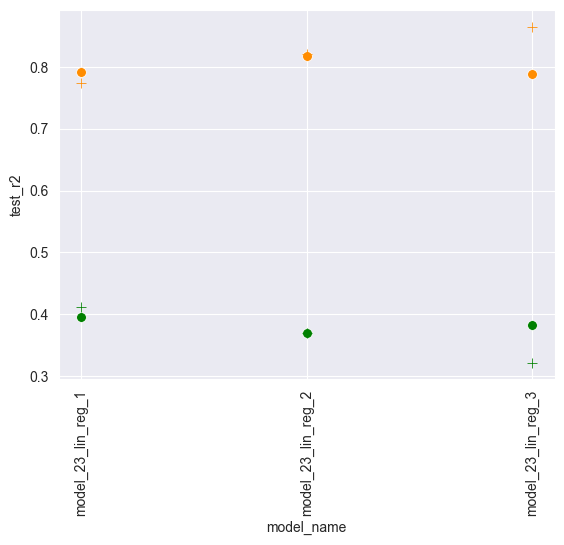

In [18]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

cross validation for scaled data

In [19]:
lin_reg_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    lin_reg_scaled = LinearRegression()
    cv_scores = cross_val_score(lin_reg_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_lin_reg_scaler_'  + str(count)
    lin_reg_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

lin_reg_cv_score_df = pd.DataFrame(lin_reg_cv_score_lst)
lin_reg_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
0,model_23_lin_reg_scaler_0,0.769
1,model_23_lin_reg_scaler_1,0.769
2,model_23_lin_reg_scaler_2,0.769


part df with the best models:

In [20]:
part_lin_reg = lin_reg_error_df.sort_values(by =['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:3]
part_lin_reg

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
1,model_23_lin_reg_2,0.820,0.370,0.074,0.818,0.369,0.073,0.001,0.002
0,model_23_lin_reg_1,0.774,0.411,0.083,0.791,0.396,0.078,0.015,0.017
2,model_23_lin_reg_3,0.865,0.322,0.063,0.789,0.382,0.077,0.060,0.076


---

### KNN Model 

+ with variable number of neighbors and variable distance metrics
+ unscaled!! - now with standart scaler

In [21]:
knn_error_lst = []
for metr in range(1,3):
    for neigh in np.arange(10,21,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, p=metr, weights='uniform')
        knn.fit(X_train_scaled, y_train)

        y_pred_knn_test = knn.predict(X_test_scaled)
        y_pred_knn_train = knn.predict(X_train_scaled)
        
        r2_test = adjusted_r2(y_test, y_pred_knn_test, X_test_scaled).round(3)
        r2_train = adjusted_r2(y_train, y_pred_knn_train, X_train_scaled).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_knn_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_knn_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_knn_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_knn_train).round(3)
        
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_knn_' + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        
knn_error_df = pd.DataFrame(knn_error_lst)
#knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])
#knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True])
knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
2,model_23_knn_1_20,0.839,0.349,0.071,0.835,0.351,0.071,0.002,0.004
1,model_23_knn_1_15,0.852,0.332,0.068,0.848,0.339,0.068,0.007,0.004
5,model_23_knn_2_20,0.835,0.352,0.072,0.829,0.359,0.072,0.007,0.006
0,model_23_knn_1_10,0.873,0.305,0.062,0.866,0.317,0.063,0.012,0.007
4,model_23_knn_2_15,0.848,0.337,0.069,0.835,0.352,0.071,0.015,0.013
3,model_23_knn_2_10,0.868,0.313,0.064,0.850,0.335,0.067,0.022,0.018


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52591/1622020098.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


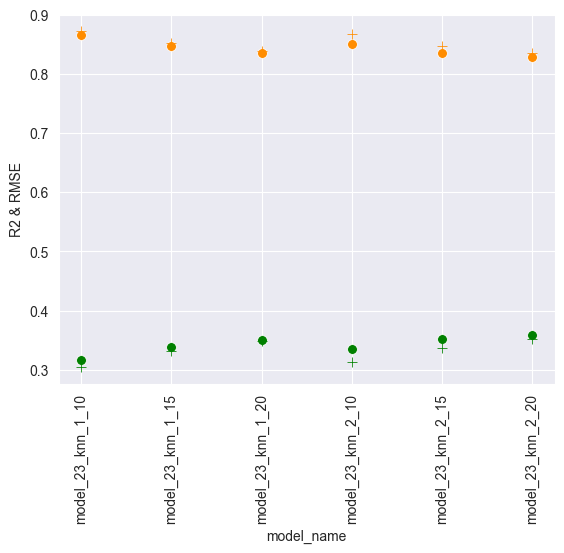

In [22]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

In [23]:
#part_knn = knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:5]
#part_knn = knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:6]
#part_knn = knn_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_knn = knn_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:7]
part_knn

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_23_knn_1_10,0.873,0.305,0.062,0.866,0.317,0.063,0.012,0.007
3,model_23_knn_2_10,0.868,0.313,0.064,0.850,0.335,0.067,0.022,0.018
1,model_23_knn_1_15,0.852,0.332,0.068,0.848,0.339,0.068,0.007,0.004
2,model_23_knn_1_20,0.839,0.349,0.071,0.835,0.351,0.071,0.002,0.004
4,model_23_knn_2_15,0.848,0.337,0.069,0.835,0.352,0.071,0.015,0.013
5,model_23_knn_2_20,0.835,0.352,0.072,0.829,0.359,0.072,0.007,0.006


scaling data

In [24]:
knn_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    knn_scaled = KNeighborsRegressor(n_neighbors= 40, p = 1)
    cv_scores = cross_val_score(knn_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_knn_scaler_'  + str(count)
    knn_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

knn_cv_score_df = pd.DataFrame(knn_cv_score_lst)
knn_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
1,model_23_knn_scaler_1,0.793
2,model_23_knn_scaler_2,0.789
0,model_23_knn_scaler_0,0.726


Decision Tree Model

In [25]:
dtree = DecisionTreeRegressor(max_depth = 4, 
                            max_leaf_nodes = 10)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10)

In [26]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)

print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

train_rmse  0.536
train_r2  0.78
train_mae  0.413
train_mape  0.083
test_rmse  0.553
test_r2  0.755
test_mae  0.426
test_mape  0.084


In [27]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

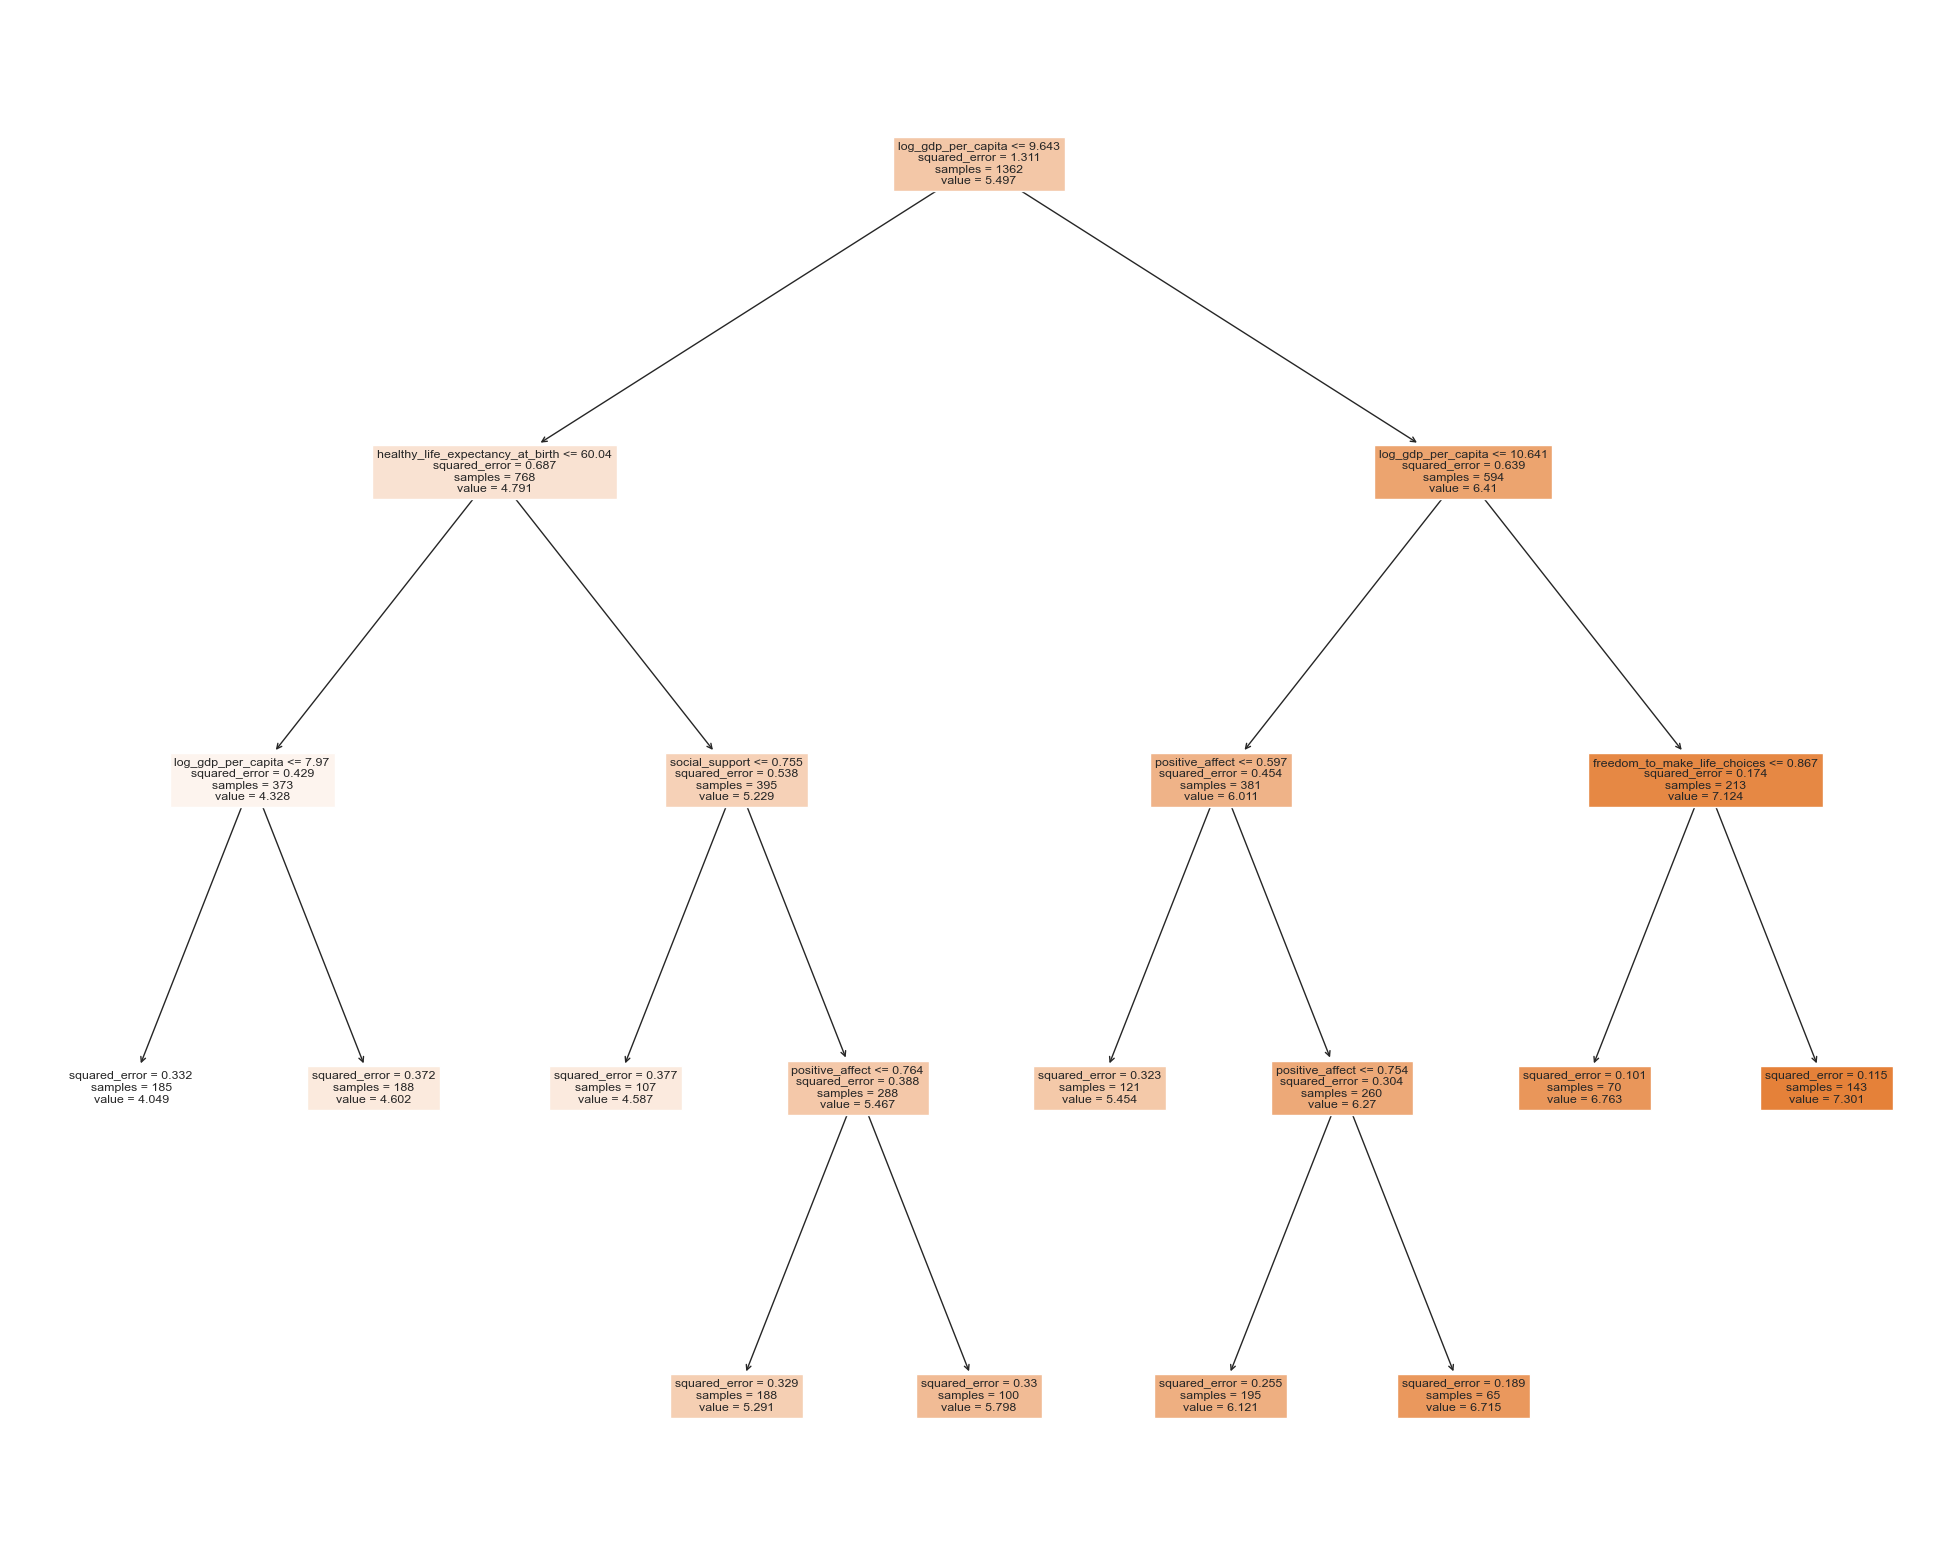

In [28]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True,
                       feature_names=X_train.columns)

In [29]:
dectree_error_lst = []
for depth in np.arange(4,6,1):
    for leaf in np.arange(10,21,5): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)

        r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
        r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_dec_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_dec_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_dec_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_dec_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2})
        

dectree_error_df = pd.DataFrame(dectree_error_lst)
dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'] , ascending=[True, True])
#dectree_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_23_dectree_dep_4_max_leaf_10,0.780,0.413,0.083,0.755,0.426,0.084,0.013,0.025
3,model_23_dectree_dep_5_max_leaf_10,0.780,0.413,0.083,0.755,0.426,0.084,0.013,0.025
4,model_23_dectree_dep_5_max_leaf_15,0.808,0.390,0.078,0.781,0.409,0.080,0.019,0.027
2,model_23_dectree_dep_4_max_leaf_20,0.807,0.388,0.078,0.780,0.411,0.080,0.023,0.027
1,model_23_dectree_dep_4_max_leaf_15,0.806,0.390,0.078,0.776,0.414,0.080,0.024,0.030
5,model_23_dectree_dep_5_max_leaf_20,0.824,0.371,0.074,0.778,0.407,0.079,0.036,0.046


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52591/2885455363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


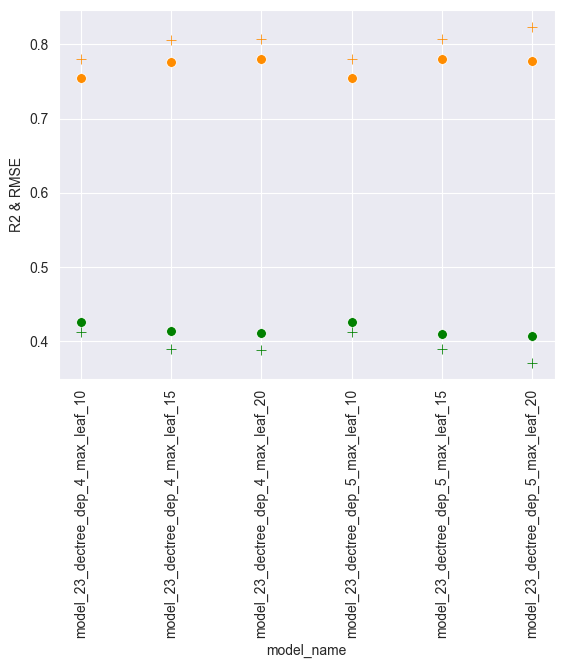

In [30]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

+ It is hard to decide which one is the optimum. But still everything is lower than knn, so we don't have to put so much effort in it.  

part df for the best models:

In [31]:
#part_dec_tree = dectree_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:6]
part_dec_tree = dectree_error_df.sort_values(by = ['delta_MAE', 'test_mae'] , ascending=[True, True]).iloc[:6]
part_dec_tree

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_23_dectree_dep_4_max_leaf_10,0.780,0.413,0.083,0.755,0.426,0.084,0.013,0.025
3,model_23_dectree_dep_5_max_leaf_10,0.780,0.413,0.083,0.755,0.426,0.084,0.013,0.025
4,model_23_dectree_dep_5_max_leaf_15,0.808,0.390,0.078,0.781,0.409,0.080,0.019,0.027
2,model_23_dectree_dep_4_max_leaf_20,0.807,0.388,0.078,0.780,0.411,0.080,0.023,0.027
1,model_23_dectree_dep_4_max_leaf_15,0.806,0.390,0.078,0.776,0.414,0.080,0.024,0.030
5,model_23_dectree_dep_5_max_leaf_20,0.824,0.371,0.074,0.778,0.407,0.079,0.036,0.046


Random Forest 

In [32]:
randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 4,
                                max_leaf_nodes = 20,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_randforest_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_randforest_train, X_train).round(3)

mae_test = mean_absolute_error(y_test, y_pred_randforest_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_randforest_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_randforest_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_randforest_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('train_mae ', mae_train) 
print('train_mape ', mape_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)
print('test_mae ', mae_test)
print('test_mape ',mape_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


Min number of nodes: 27
Average number of nodes: 30
Max number of nodes: 31
Min maximum depth: 4
Average maximum depth: 4
Max maximum depth: 4
Number of Trees: 100
train_rmse  0.485
train_r2  0.819
train_mae  0.368
train_mape  0.075
test_rmse  0.489
test_r2  0.808
test_mae  0.371
test_mape  0.075


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [33]:
randforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'max_leaf_nodes': 20,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 1,
 'warm_start': False}

In [34]:
random_trees_error_lst = []
for tree_depth in np.arange(4,7,1):
    for tree_leaf in np.arange(10,21,5): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        
        r2_test = adjusted_r2(y_test, y_pred_random_forest_test, X_test).round(3)
        r2_train = adjusted_r2(y_train, y_pred_random_forest_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_random_forest_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_random_forest_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_random_forest_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_random_forest_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2,}) 
        

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#random_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[P

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_23_forest_tree_depth4_max_leaf_10,0.802,0.384,0.078,0.795,0.383,0.078,0.001,0.007
3,model_23_forest_tree_depth5_max_leaf_10,0.803,0.383,0.078,0.795,0.384,0.078,0.001,0.008
6,model_23_forest_tree_depth6_max_leaf_10,0.803,0.383,0.078,0.795,0.384,0.078,0.001,0.008
2,model_23_forest_tree_depth4_max_leaf_20,0.819,0.368,0.075,0.808,0.371,0.075,0.003,0.011
1,model_23_forest_tree_depth4_max_leaf_15,0.818,0.369,0.075,0.808,0.372,0.075,0.003,0.010
4,model_23_forest_tree_depth5_max_leaf_15,0.826,0.363,0.074,0.813,0.369,0.074,0.006,0.013
7,model_23_forest_tree_depth6_max_leaf_15,0.827,0.360,0.073,0.813,0.369,0.074,0.009,0.014
5,model_23_forest_tree_depth5_max_leaf_20,0.838,0.350,0.071,0.821,0.361,0.073,0.011,0.017
8,model_23_forest_tree_depth6_max_leaf_20,0.842,0.347,0.071,0.823,0.359,0.072,0.012,0.019


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52591/4267177350.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


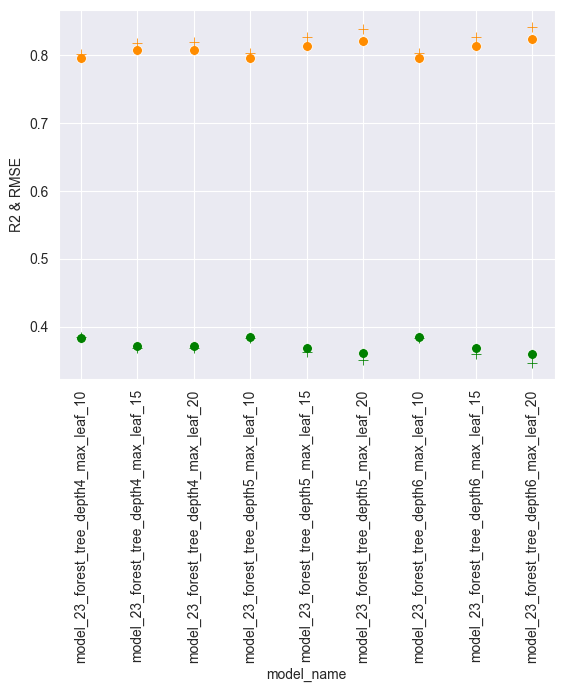

In [35]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

Like in the decision tree model max_depth = 3 and max_leaf_node = 8 is the optimum, we can just choose this combination

In [36]:
#part_forest = random_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:4]
part_forest = random_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_forest

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_23_forest_tree_depth4_max_leaf_10,0.802,0.384,0.078,0.795,0.383,0.078,0.001,0.007
3,model_23_forest_tree_depth5_max_leaf_10,0.803,0.383,0.078,0.795,0.384,0.078,0.001,0.008
6,model_23_forest_tree_depth6_max_leaf_10,0.803,0.383,0.078,0.795,0.384,0.078,0.001,0.008
2,model_23_forest_tree_depth4_max_leaf_20,0.819,0.368,0.075,0.808,0.371,0.075,0.003,0.011
1,model_23_forest_tree_depth4_max_leaf_15,0.818,0.369,0.075,0.808,0.372,0.075,0.003,0.010
4,model_23_forest_tree_depth5_max_leaf_15,0.826,0.363,0.074,0.813,0.369,0.074,0.006,0.013


Test: AdaBoostRegressor

In [37]:
ada = AdaBoostRegressor(n_estimators=100, random_state=8)
ada.fit(X_train, y_train)

y_pred_ada_test = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)

ada_boost_error = pd.DataFrame([{'model_name': model_name + '_ada_boost', 
                    'train_r2':r2_score(y_train, y_pred_ada_train).round(3), 
                    'train_mae': mean_absolute_error(y_train, y_pred_ada_train).round(3),
                    'train_mape': mean_absolute_percentage_error(y_train, y_pred_ada_train).round(3),
                    'test_r2':r2_score(y_test, y_pred_ada_test).round(3),
                    'test_mae': mean_absolute_error(y_test, y_pred_ada_test).round(3),
                    'test_mape': mean_absolute_percentage_error(y_test, y_pred_ada_test).round(3)
                    }])

ada_boost_error['delta_R2'] = abs(ada_boost_error['train_r2'] - ada_boost_error['test_r2'])
ada_boost_error['delta_MAE'] = abs(ada_boost_error['train_mae'] - ada_boost_error['test_mae'])
ada_boost_error

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_R2,delta_MAE
0,model_23_ada_boost,0.828,0.393,0.077,0.81,0.39,0.076,0.018,0.003


In [38]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': 8}

Test:  Extra Tree Regressor

In [39]:
extra_trees_error_lst = []
max_feat = 1.0
#max_depth = 10
for max_nodes in np.arange(50,51,1):
    for max_depth in np.arange(5,13,1): 
        extra_tree = ExtraTreesRegressor(n_estimators=50, 
                                random_state=123, 
                                max_features = max_feat,
                                max_depth= max_depth,
                                max_leaf_nodes= max_nodes,
                                n_jobs=-1, verbose = 1)
        extra_tree.fit(X_train, y_train)
        
        y_pred_extra_tree_test = extra_tree.predict(X_test)
        y_pred_extra_tree_train = extra_tree.predict(X_train)

        rmse_test = mean_squared_error(y_test, y_pred_extra_tree_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_extra_tree_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_extra_tree_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_extra_tree_train, X_train).round(3)
        
        mae_test = mean_absolute_error(y_test, y_pred_extra_tree_test).round(3)
        mape_test = mean_absolute_percentage_error(y_test, y_pred_extra_tree_test).round(3)
        mae_train = mean_absolute_error(y_train, y_pred_extra_tree_train).round(3)
        mape_train = mean_absolute_percentage_error(y_train, y_pred_extra_tree_train).round(3)
        

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)
        delta_mae = abs(mae_train - mae_test)

        model_descrip = model_name + '_extra_depth' + str(max_depth) + '_max_nodes_' + str(max_nodes)
        extra_trees_error_lst.append({'model_name': model_descrip,
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train, 
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae,
                      'delta_R2':delta_r2}) 
        

extra_trees_error_df = pd.DataFrame(extra_trees_error_lst)
extra_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True])
#extra_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[P

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_23_extra_depth5_max_nodes_50,0.827,0.365,0.074,0.820,0.365,0.073,0.000,0.007
1,model_23_extra_depth6_max_nodes_50,0.856,0.333,0.067,0.837,0.348,0.069,0.015,0.019
2,model_23_extra_depth7_max_nodes_50,0.867,0.322,0.065,0.842,0.344,0.068,0.022,0.025
3,model_23_extra_depth8_max_nodes_50,0.872,0.318,0.064,0.846,0.341,0.068,0.023,0.026
4,model_23_extra_depth9_max_nodes_50,0.875,0.315,0.063,0.846,0.342,0.068,0.027,0.029
5,model_23_extra_depth10_max_nodes_50,0.876,0.313,0.063,0.846,0.341,0.068,0.028,0.030
7,model_23_extra_depth12_max_nodes_50,0.876,0.313,0.063,0.847,0.341,0.068,0.028,0.029
6,model_23_extra_depth11_max_nodes_50,0.877,0.313,0.063,0.846,0.342,0.068,0.029,0.031


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52591/353634127.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


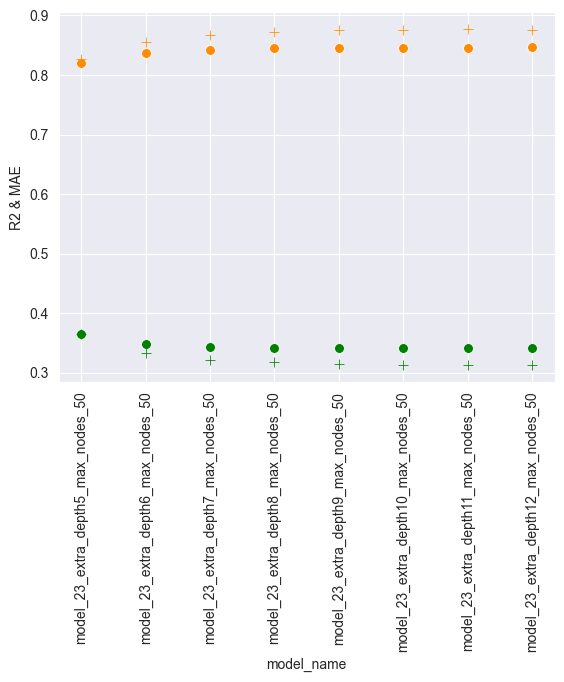

In [40]:
g=sns.scatterplot(data = extra_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s = 50)
g=sns.scatterplot(data = extra_trees_error_df, x = 'model_name', y = 'test_mae', color = 'green', s = 50)
g=sns.scatterplot(data = extra_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s = 50)
g=sns.scatterplot(data = extra_trees_error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s = 50)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & MAE')
plt.show();

In [41]:
#part_forest = random_trees_error_df.sort_values(by = ['test_mae', 'delta_MAE'], ascending=[True, True]).iloc[:4]
part_extra = extra_trees_error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, True]).iloc[:6]
part_extra

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_23_extra_depth5_max_nodes_50,0.827,0.365,0.074,0.820,0.365,0.073,0.000,0.007
1,model_23_extra_depth6_max_nodes_50,0.856,0.333,0.067,0.837,0.348,0.069,0.015,0.019
2,model_23_extra_depth7_max_nodes_50,0.867,0.322,0.065,0.842,0.344,0.068,0.022,0.025
3,model_23_extra_depth8_max_nodes_50,0.872,0.318,0.064,0.846,0.341,0.068,0.023,0.026
4,model_23_extra_depth9_max_nodes_50,0.875,0.315,0.063,0.846,0.342,0.068,0.027,0.029
5,model_23_extra_depth10_max_nodes_50,0.876,0.313,0.063,0.846,0.341,0.068,0.028,0.030


tree_ex_error_lst = []
estim = 50
max_feat = 0.4
tree_ex = ExtraTreesRegressor(n_estimators=estim, 
                                random_state=123, 
                                max_features = max_feat,
                                max_depth= 1,
                                n_jobs=-1, verbose = 1)
tree_ex.fit(X_train, y_train)
        
y_pred_extra_tree_test = tree_ex.predict(X_test)
y_pred_extra_tree_train = tree_ex.predict(X_train)

r2_test = adjusted_r2(y_test, y_pred_extra_tree_test, X_test).round(3)
r2_train = adjusted_r2(y_train, y_pred_extra_tree_train, X_train).round(3)
        
mae_test = mean_absolute_error(y_test, y_pred_extra_tree_test).round(3)
mape_test = mean_absolute_percentage_error(y_test, y_pred_extra_tree_test).round(3)
mae_train = mean_absolute_error(y_train, y_pred_extra_tree_train).round(3)
mape_train = mean_absolute_percentage_error(y_train, y_pred_extra_tree_train).round(3)
        
delta_mae = abs(mae_train - mae_test)

model_descrip = model_name + '_extra_estim' + str(estim) + '_max_feat_' + str(max_feat)
tree_ex_error_lst.append({'model_name': model_descrip,  
                      'train_r2':r2_train, 
                      'train_mae': mae_train, 
                      'train_mape':mape_train,
                      'test_r2':r2_test,
                      'test_mae': mae_test, 
                      'test_mape':mape_test,
                      'delta_MAE':delta_mae}) 
        

tree_ex_error_df = pd.DataFrame(tree_ex_error_lst)
tree_ex_error_df

Concat the optimal models of each algorithm to one big error_df:  

In [42]:
error_df = pd.concat([part_knn,
                      part_dec_tree,
                      part_forest,
                      ada_boost_error,
                      part_extra],  axis = 0)
                      
error_df.sort_values(by = ['delta_MAE', 'test_mae'], ascending=[True, False])


,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_23_extra_depth5_max_nodes_50,0.827,0.365,0.074,0.820,0.365,0.073,0.000,0.007
3,model_23_forest_tree_depth5_max_leaf_10,0.803,0.383,0.078,0.795,0.384,0.078,0.001,0.008
6,model_23_forest_tree_depth6_max_leaf_10,0.803,0.383,0.078,0.795,0.384,0.078,0.001,0.008
0,model_23_forest_tree_depth4_max_leaf_10,0.802,0.384,0.078,0.795,0.383,0.078,0.001,0.007
2,model_23_knn_1_20,0.839,0.349,0.071,0.835,0.351,0.071,0.002,0.004
0,model_23_ada_boost,0.828,0.393,0.077,0.810,0.390,0.076,0.003,0.018
1,model_23_forest_tree_depth4_max_leaf_15,0.818,0.369,0.075,0.808,0.372,0.075,0.003,0.010
2,model_23_forest_tree_depth4_max_leaf_20,0.819,0.368,0.075,0.808,0.371,0.075,0.003,0.011
4,model_23_forest_tree_depth5_max_leaf_15,0.826,0.363,0.074,0.813,0.369,0.074,0.006,0.013
5,model_23_knn_2_20,0.835,0.352,0.072,0.829,0.359,0.072,0.007,0.006


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_52591/4059825178.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


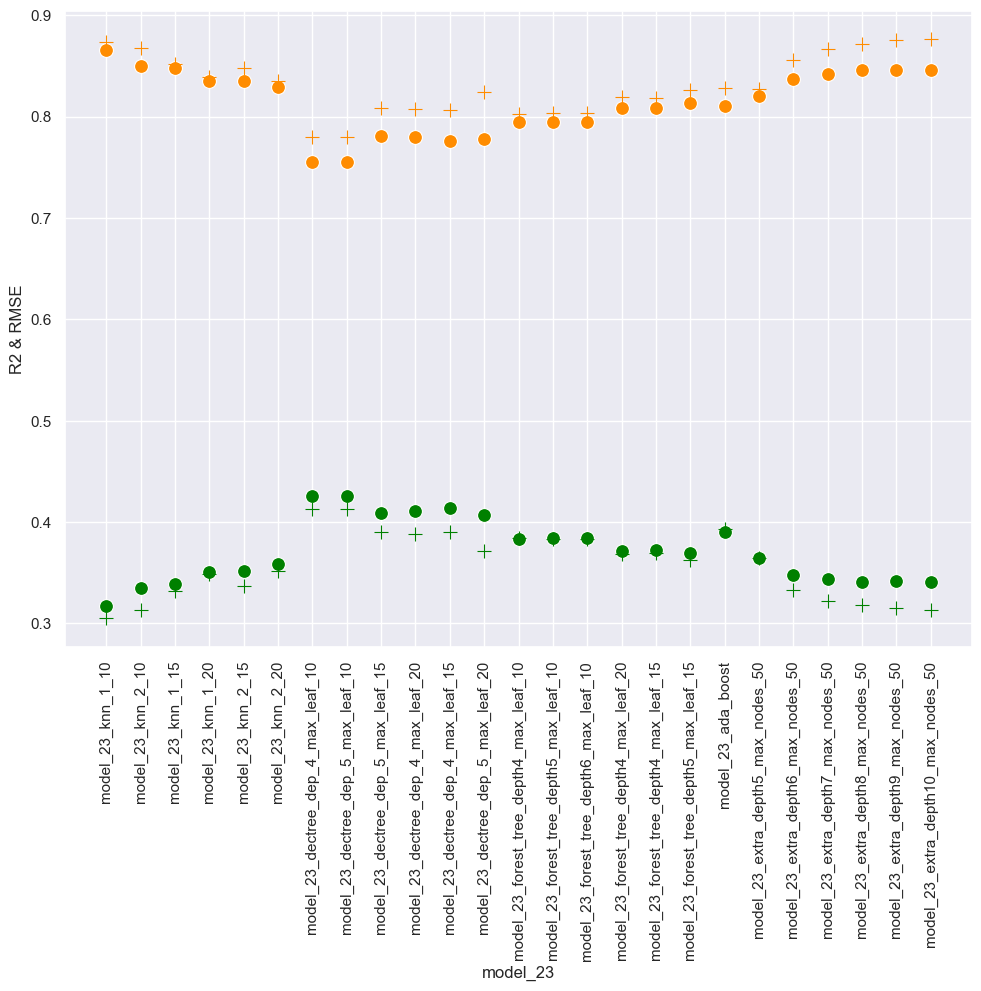

In [43]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_mae', color = 'green', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange', s=100)
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_mae', marker='+', color = 'green', s=100)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
g.set(xlabel=model_name)
plt.show();

In [44]:
error_df[error_df['test_mape']==error_df['test_mape'].min()]

,model_name,train_r2,train_mae,train_mape,test_r2,test_mae,test_mape,delta_MAE,delta_R2
0,model_23_knn_1_10,0.873,0.305,0.062,0.866,0.317,0.063,0.012,0.007


In [45]:
error_df.to_csv(f'Metrics_Summary_{model_name}.txt', index=False)

In [46]:
et_clf = ExtraTreesRegressor(n_estimators=300)
et_clf = et_clf.fit(X_train, y_train)
feature_importances = et_clf.feature_importances_
fi_lst = []
for idx, i in enumerate(X_train.columns.to_list()):
    fi_lst.append({'feature_name': i, 'feature_importance': feature_importances[idx]})
    #print(i, feature_importances[idx])
feature_df = pd.DataFrame(fi_lst)
feature_df.sort_values('feature_importance')

,feature_name,feature_importance
6,negative_affect,0.026289
3,freedom_to_make_life_choices,0.054509
4,perceptions_of_corruption,0.059005
5,positive_affect,0.082684
7,mys_year,0.100406
2,healthy_life_expectancy_at_birth,0.166091
1,social_support,0.189918
0,log_gdp_per_capita,0.321099


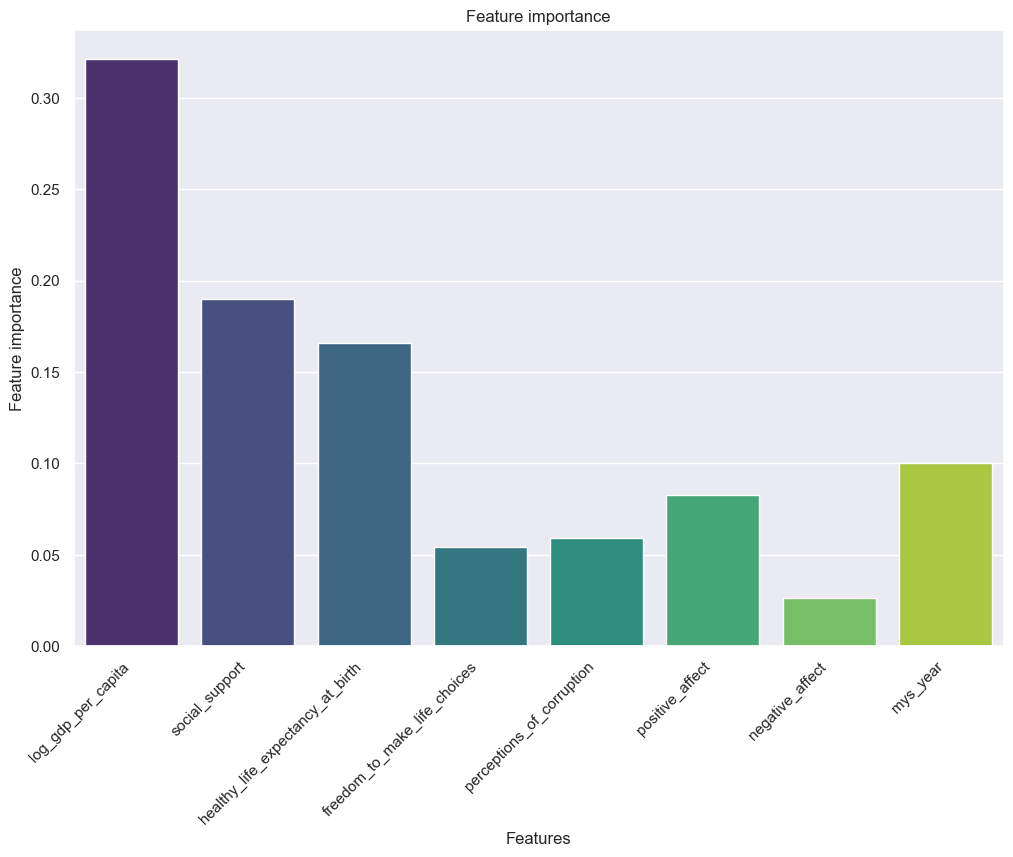

In [47]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_df['feature_name'],
            y=feature_df['feature_importance'].sort_values(ascending=False),
            palette="viridis")
plt.title('Feature importance')
plt.xlabel('Features')
plt.ylabel('Feature importance')
plt.xticks(rotation=45, ha="right")
plt.show()